In [18]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# create state space and initial state probabilities

states = ['open', 'close', 'hold']
pi = [0.35, 0.35, 0.3]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

open     0.35
close    0.35
hold     0.30
Name: states, dtype: float64
1.0


In [19]:
# source: http://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017

In [20]:
# create transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, .3]

print(q_df)

q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

       open close hold
open    0.4   0.2  0.4
close  0.45  0.45  0.1
hold   0.45  0.25  0.3

 [[0.4 0.2 0.4]
 [0.45 0.45 0.1]
 [0.45 0.25 0.3]] (3, 3) 

open     1.0
close    1.0
hold     1.0
dtype: float64


In [21]:
from pprint import pprint 

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('close', 'close'): 0.45,
 ('close', 'hold'): 0.1,
 ('close', 'open'): 0.45,
 ('hold', 'close'): 0.25,
 ('hold', 'hold'): 0.3,
 ('hold', 'open'): 0.45,
 ('open', 'close'): 0.2,
 ('open', 'hold'): 0.4,
 ('open', 'open'): 0.4}


Nodes:
['open', 'close', 'hold']

Edges:
[('open', 'open', {'label': 0.4, 'weight': 0.4}),
 ('open', 'close', {'label': 0.2, 'weight': 0.2}),
 ('open', 'hold', {'label': 0.4, 'weight': 0.4}),
 ('close', 'open', {'label': 0.45, 'weight': 0.45}),
 ('close', 'close', {'label': 0.45, 'weight': 0.45}),
 ('close', 'hold', {'label': 0.1, 'weight': 0.1}),
 ('hold', 'open', {'label': 0.45, 'weight': 0.45}),
 ('hold', 'close', {'label': 0.25, 'weight': 0.25}),
 ('hold', 'hold', {'label': 0.3, 'weight': 0.3})]


{('close', 'close'): <matplotlib.text.Text at 0xc0a9da0>,
 ('close', 'hold'): <matplotlib.text.Text at 0xc0b1588>,
 ('close', 'open'): <matplotlib.text.Text at 0xc0a95f8>,
 ('hold', 'close'): <matplotlib.text.Text at 0xc0bb518>,
 ('hold', 'hold'): <matplotlib.text.Text at 0xc0bbcc0>,
 ('hold', 'open'): <matplotlib.text.Text at 0xc0b1d30>,
 ('open', 'close'): <matplotlib.text.Text at 0xc0a4668>,
 ('open', 'hold'): <matplotlib.text.Text at 0xc0a4e10>,
 ('open', 'open'): <matplotlib.text.Text at 0xc095860>}

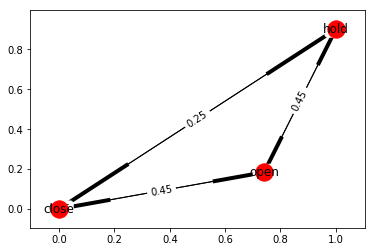

In [22]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

# pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
# nx.drawing.nx_pydot.write_dot(G, 'pet_dog_markov.dot')